#Fundamentos de la ciencia de datos e Inteligencia de negocios 
#Evaluación de aprendizaje Numero 3

**ALUMNO**: Coradini Gonzalo Fabian

**DNI**: 38946395

# Spotify - Análisis de las canciones

##Descripción
Spotify es una aplicación multiplataforma sueca, empleada para la reproducción de música vía streaming. Permite escuchar música en “modo radio”, buscar por artista, álbum o listas de reproducción creadas por los propios usuarios. 

Se cuenta con la información de las canciones que pasaron por la plataforma. Incluye información de cada canción además de las características musicales que la definen, lo que permitirá realizar un análisis más a fondo sobre cada canción y su género en específico.

Se busca analizar esta información para conocer sobre las canciones más populares, artistas preferidos y sus canciones, promedio de duración de las canciones, así como también conocer cuáles son las características musicales que hacen populares a las canciones y buscar patrones para representar a estas canciones dentro de géneros musicales.


##Objetivos
* Conocer a fondo los géneros y artistas que marcaron tendencia a través de los años y las canciones más relevantes.
* Buscar patrones musicales que puedan indicar géneros musicales en base a las características de las canciones.


##Carga de datos

Librerias

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import copy
import matplotlib
import plotly.express as px
from PIL import Image
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (30,15)

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs

from joblib import dump, load
from sklearn.preprocessing import StandardScaler

from matplotlib.backends.backend_pdf import PdfPages

from google.colab import files
import io

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Se carga el dataset 

In [2]:
dt_path='https://raw.githubusercontent.com/GCoradini/FCDIN/master/Spotify_clusters.csv'
df = pd.read_csv(dt_path, sep =';',na_values="." ,decimal=",")
df.shape

(116626, 18)

Dataset Cargado

In [3]:
df.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Children’s Music,Rage Against The Machine,Sleep Now In the Fire,1MQTmpYOZ6fcMQc56Hdo7T,65,0.00162,0.426,205600,0.929,0.105000,D,0.0789,-6.729,Major,0.0701,127.059,4-abr,0.539
1,Rap,Rage Against The Machine,Sleep Now In the Fire,1MQTmpYOZ6fcMQc56Hdo7T,66,0.00162,0.426,205600,0.929,0.105000,D,0.0789,-6.729,Major,0.0701,127.059,4-abr,0.539
2,Rock,Rage Against The Machine,Sleep Now In the Fire,1MQTmpYOZ6fcMQc56Hdo7T,66,0.00162,0.426,205600,0.929,0.105000,D,0.0789,-6.729,Major,0.0701,127.059,4-abr,0.539
3,Reggae,Mavado,Big Like Jesus,1MqV6t7WeY8yIn7qDR5paJ,45,0.16100,0.876,149002,0.820,0.000142,F,0.0668,-3.885,Minor,0.1660,99.975,4-abr,0.608
4,Dance,Rudimental,Let Me Live - Acoustic,1mqVImA1k8qma45Lqc8CNR,44,0.53900,0.680,218049,0.547,0.000000,G#,0.0877,-4.762,Major,0.0414,142.053,4-abr,0.641


Se eliminaran registros con el mismo id pero que pertenezcan a diferentes géneros.

In [4]:
df = df.drop_duplicates(subset=['track_id'], keep='last')

Seteo la entrada track_id como index del dataframe

In [5]:
df = df.set_index(df["track_id"])
df.drop(["track_id"], axis=1, inplace=True)

Dataset Cargado

In [6]:
df.head(5)

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
track_id,,,,,,,,,,,,,,,,,
1MQTmpYOZ6fcMQc56Hdo7T,Rock,Rage Against The Machine,Sleep Now In the Fire,66,0.00162,0.426,205600,0.929,0.105000,D,0.0789,-6.729,Major,0.0701,127.059,4-abr,0.5390
1MqV6t7WeY8yIn7qDR5paJ,Reggae,Mavado,Big Like Jesus,45,0.16100,0.876,149002,0.820,0.000142,F,0.0668,-3.885,Minor,0.1660,99.975,4-abr,0.6080
1mqVImA1k8qma45Lqc8CNR,Dance,Rudimental,Let Me Live - Acoustic,44,0.53900,0.680,218049,0.547,0.000000,G#,0.0877,-4.762,Major,0.0414,142.053,4-abr,0.6410
1MQvks56R8DYB2ToA36qMi,Opera,Giacomo Meyerbeer,"L'Africaine / Act 4: ""Pays Merveilleux ... O P...",9,0.98700,0.237,219027,0.114,0.050400,F#,0.4630,-20.052,Major,0.0407,82.954,3-abr,0.0701
1MQWtVcs0PKsY4PA6ZvLiy,Rock,Sly & The Family Stone,Dance to the Music,61,0.01680,0.703,179427,0.529,0.000573,G,0.9110,-11.112,Major,0.1000,128.057,4-abr,0.7720


In [7]:
df.shape

(88551, 17)

Información sobre los tipos de las variables

In [8]:
df.dtypes

genre                object
artist_name          object
track_name           object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

Se muestra información estadistica sobre el dataset cargado

In [9]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,88551.000000,88551.000000,88551.000000,8.855100e+04,88551.000000,88551.000000,88551.000000,88551.000000,88551.000000,88551.000000,88551.000000
mean,36.479644,0.404246,0.540873,2.361284e+05,0.555934,0.171251,0.223585,-10.157726,0.127051,117.117420,0.451415
std,17.521092,0.366491,0.190671,1.331704e+05,0.276328,0.322429,0.209749,6.412631,0.203843,31.293808,0.267932
min,0.000000,0.000000,0.057200,1.538700e+04,0.000020,0.000000,0.010500,-47.499000,0.022200,32.080000,0.000000
25%,25.000000,0.045000,0.415000,1.779730e+05,0.341000,0.000000,0.097600,-12.880500,0.036800,92.001000,0.221000
50%,37.000000,0.289000,0.558000,2.195470e+05,0.591000,0.000071,0.130000,-8.213000,0.049400,114.981000,0.441000
75%,49.000000,0.790000,0.683000,2.682930e+05,0.789000,0.087300,0.275000,-5.636000,0.101000,138.671500,0.666000
max,99.000000,0.996000,0.989000,5.488000e+06,0.999000,0.999000,1.000000,1.893000,0.967000,242.903000,1.000000


##Análisis de datos

###Análisis de valores nulos

Veo la distribución de nulos en las variables

In [10]:
val_nulos = df.isnull().sum()
print(df.shape)
print(val_nulos)

(88551, 17)
genre               0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


No se encuentran valores nulos dentro del dataframe

###Análisis de outliers

Se graficara cada variable en graficos y se analizara cada caso

####Acousticness

Indica que tan acústica es la canción. Un valor cercano a 1 indica que la canción es más acústica.

Mediana:  0.289


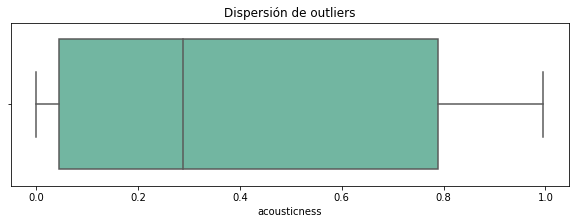

In [11]:
plt.figure(figsize=(10, 3))
plt.title('Dispersión de outliers')
sns.boxplot(df["acousticness"], orient = 'h', palette="Set2")

print("Mediana: ",df["acousticness"].median())

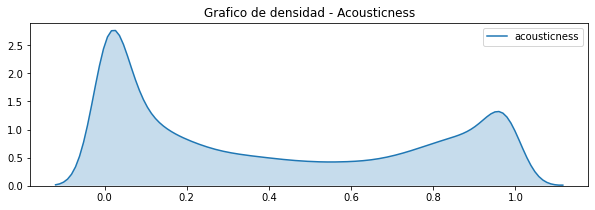

In [12]:
plt.figure(figsize=(10, 3))
plt.title('Grafico de densidad - Acousticness')
sns.kdeplot(df['acousticness'], shade=True) 

####Danceability

Indica que tan adecuada es una canción para bailar basándose en su ritmo y tempo. Un valor alto, cercano a 1, indica que la canción es más bailable.

Mediana:  0.5579999999999999


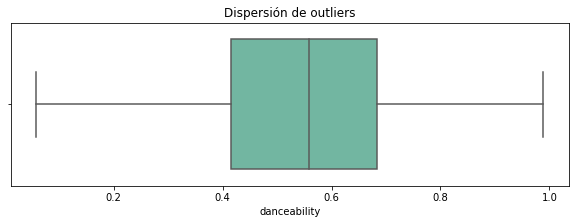

In [13]:
plt.figure(figsize=(10, 3))
plt.title('Dispersión de outliers')
sns.boxplot(df["danceability"], orient = 'h', palette="Set2")

print("Mediana: ",df["danceability"].median())

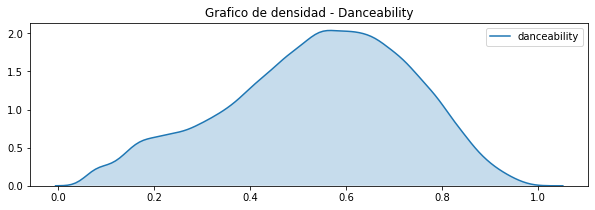

In [14]:
plt.figure(figsize=(10, 3))
plt.title('Grafico de densidad - Danceability')
sns.kdeplot(df['danceability'], shade=True) 

Todos los valores se encuentran alrededor de la mediana , no es necesario imputar outliers.

####Duration

Duración de la canción en milisegundos

Mediana:  219547.0


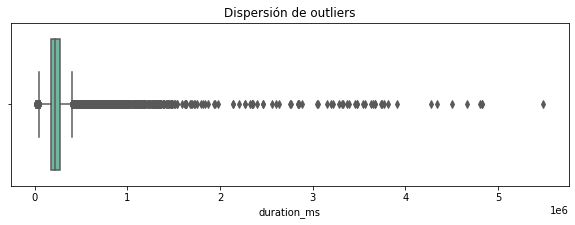

In [ ]:
plt.figure(figsize=(10, 3))
plt.title('Dispersión de outliers')
sns.boxplot(df["duration_ms"], orient = 'h', palette="Set2")

print("Mediana: ",df["duration_ms"].median())

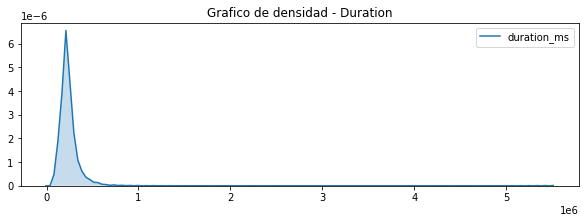

In [ ]:
plt.figure(figsize=(10, 3))
plt.title('Grafico de densidad - Duration')
sns.kdeplot(df['duration_ms'], shade=True) 

Aunque hay gran cantidad de outliers por derecha, esta variable no se imputara debido a que la duración de la canción puede influir en el género. Hay géneros que sus canciones duran en promedio más que otros géneros, esto puede ayudar a determinar el género de la canción.

####Energy

Representa la intensidad de la canción. A mayor valor de energía, las canciones son mas rápidas, mas ruidosas, como por ejemplo canciones de rock o metal son mas ruidosas que canciones clásicas.

Mediana:  0.591


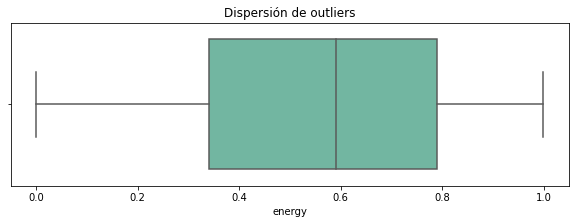

In [ ]:
plt.figure(figsize=(10, 3))
plt.title('Dispersión de outliers')
sns.boxplot(df["energy"], orient = 'h', palette="Set2")

print("Mediana: ",df["energy"].median())

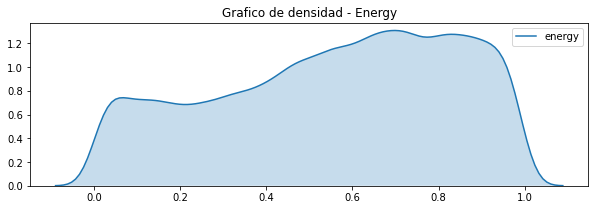

In [ ]:
plt.figure(figsize=(10, 3))
plt.title('Grafico de densidad - Energy')
sns.kdeplot(df['energy'], shade=True) 

Todos los valores se encuentran alrededor de la mediana , no es necesario imputar outliers.

####Instrumentalness

Indica si una canción posee sonidos provenientes de la voz o no sobre la pista. Pistas superiores a 0.5 se consideran instrumentales, aunque la probabilidad aumenta a medida que el valor se acerca a 1.

Mediana:  7.070000000000001e-05


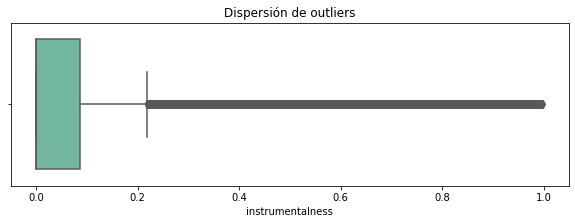

In [ ]:
plt.figure(figsize=(10, 3))
plt.title('Dispersión de outliers')
sns.boxplot(df["instrumentalness"], orient = 'h', palette="Set2")

print("Mediana: ",df["instrumentalness"].median())

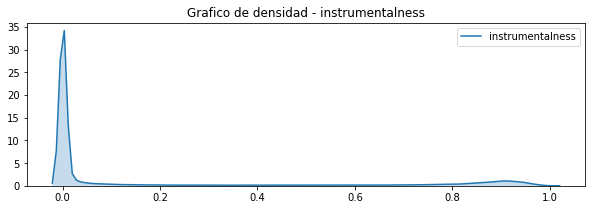

In [ ]:
plt.figure(figsize=(10, 3))
plt.title('Grafico de densidad - instrumentalness')
sns.kdeplot(df['instrumentalness'], shade=True) 

Esta variable posee una gran cantidad de valores outliers por izquierda , pero estos indican la cantidad de voces que hay sobre una pista. No se deberían imputar, ya que hay géneros donde no hay voces sobre la canción y otras sí.

####Liveness

Indica si la pista se grabo en vivo o en un estudio. Un valor superior a 0,8 indicaría, con gran probabilidad, que la pista fue grabada en vivo.

Mediana:  0.13


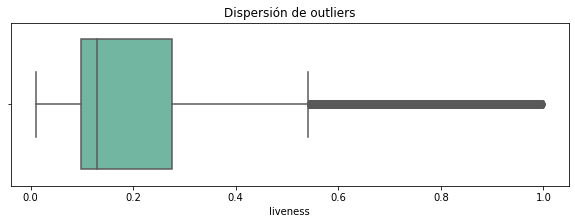

In [ ]:
plt.figure(figsize=(10, 3))
plt.title('Dispersión de outliers')
sns.boxplot(df["liveness"], orient = 'h', palette="Set2")

print("Mediana: ",df["liveness"].median())

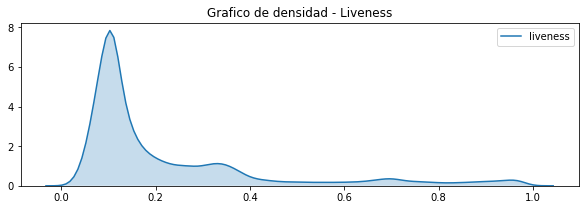

In [ ]:
plt.figure(figsize=(10, 3))
plt.title('Grafico de densidad - Liveness')
sns.kdeplot(df['liveness'], shade=True) 

####Loudness

Indica el volumen general, en decibelios (dB), de la pista.

Mediana:  -8.213


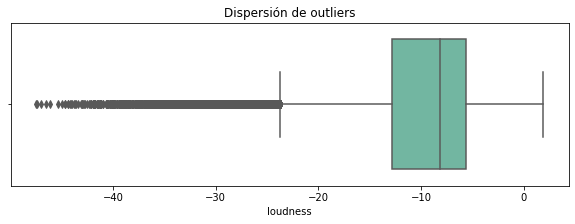

In [ ]:
plt.figure(figsize=(10, 3))
plt.title('Dispersión de outliers')
sns.boxplot(df["loudness"], orient = 'h', palette="Set2")

print("Mediana: ",df["loudness"].median())

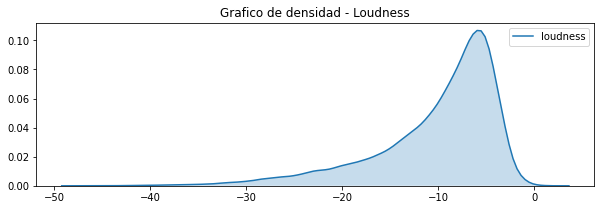

In [ ]:
plt.figure(figsize=(10, 3))
plt.title('Grafico de densidad - Loudness')
sns.kdeplot(df['loudness'], shade=True) 

Esta variable posee una gran cantidad de valores outliers por izquierda , pero no deberían imputarse ya que un volumen alto puede corresponder a pistas de rock y un volumen bajo a canciones para chicos, por ejemplo. 

####Speechiness

Indica la presencia de palabras habladas en la canción. Valores superiores a 0.66 indican que la pista posee muchas palabras durante toda la pista. Cuando el valor sea cercano a 1, indica que la canción posee una gran cantidad de palabras.

Mediana:  0.0494


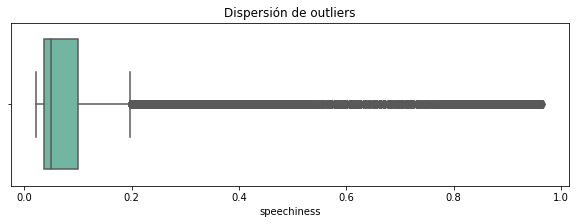

In [ ]:
plt.figure(figsize=(10, 3))
plt.title('Dispersión de outliers')
sns.boxplot(df["speechiness"], orient = 'h', palette="Set2")

print("Mediana: ",df["speechiness"].median())

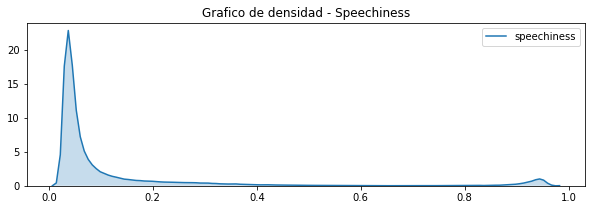

In [ ]:
plt.figure(figsize=(10, 3))
plt.title('Grafico de densidad - Speechiness')
sns.kdeplot(df['speechiness'], shade=True) 

Otra variable que posee outliers pero que no se deberían imputar ya que la cantidad de palabras que posee una canción puede influir en su género. Quizás pocas palabras puede indicar el género de música clásica y muchas indicaría Hip Hop o Rap.

####Tempo

Indica el ritmo, velocidad de la pista. Esta se deriva de la duración promedio de la pista.

Mediana:  114.98100000000001


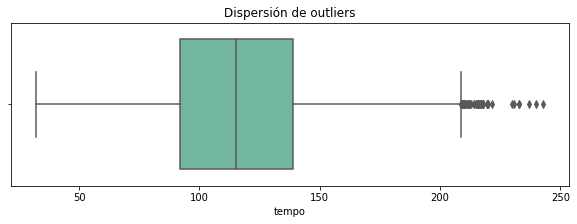

In [ ]:
plt.figure(figsize=(10, 3))
plt.title('Dispersión de outliers')
sns.boxplot(df["tempo"], orient = 'h', palette="Set2")

print("Mediana: ",df["tempo"].median())

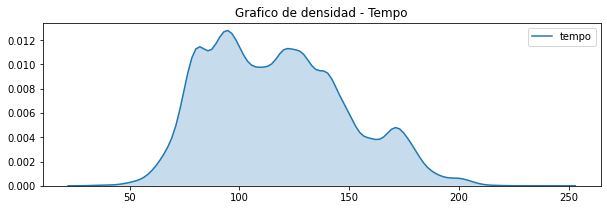

In [ ]:
plt.figure(figsize=(10, 3))
plt.title('Grafico de densidad - Tempo')
sns.kdeplot(df['tempo'], shade=True) 

Variable que posee pocos outliers por derecha. Gran parte de sus valores se encuentra distribuido alrededor de la mediana. No se imputará ya que los géneros pueden tener ritmos que los identifiquen.

####Valence

Indica la positividad de la pista de la canción. Una canción más positiva (más alegre) tiene valores cercanos a 1, mientras que cuanto más cercano sea el valor a 0, la canción será más triste y depresiva.

Mediana:  0.441


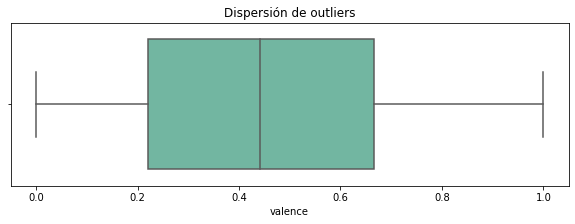

In [ ]:
plt.figure(figsize=(10, 3))
plt.title('Dispersión de outliers')
sns.boxplot(df["valence"], orient = 'h', palette="Set2")

print("Mediana: ",df["valence"].median())

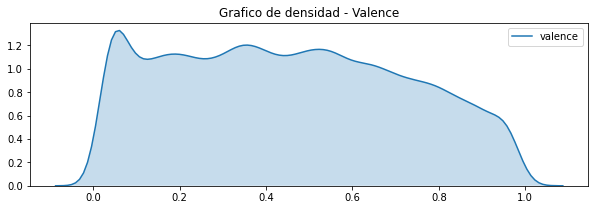

In [ ]:
plt.figure(figsize=(10, 3))
plt.title('Grafico de densidad - Valence')
sns.kdeplot(df['valence'], shade=True) 

##Estandarización

In [15]:
df.head(5)

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
track_id,,,,,,,,,,,,,,,,,
1MQTmpYOZ6fcMQc56Hdo7T,Rock,Rage Against The Machine,Sleep Now In the Fire,66,0.00162,0.426,205600,0.929,0.105000,D,0.0789,-6.729,Major,0.0701,127.059,4-abr,0.5390
1MqV6t7WeY8yIn7qDR5paJ,Reggae,Mavado,Big Like Jesus,45,0.16100,0.876,149002,0.820,0.000142,F,0.0668,-3.885,Minor,0.1660,99.975,4-abr,0.6080
1mqVImA1k8qma45Lqc8CNR,Dance,Rudimental,Let Me Live - Acoustic,44,0.53900,0.680,218049,0.547,0.000000,G#,0.0877,-4.762,Major,0.0414,142.053,4-abr,0.6410
1MQvks56R8DYB2ToA36qMi,Opera,Giacomo Meyerbeer,"L'Africaine / Act 4: ""Pays Merveilleux ... O P...",9,0.98700,0.237,219027,0.114,0.050400,F#,0.4630,-20.052,Major,0.0407,82.954,3-abr,0.0701
1MQWtVcs0PKsY4PA6ZvLiy,Rock,Sly & The Family Stone,Dance to the Music,61,0.01680,0.703,179427,0.529,0.000573,G,0.9110,-11.112,Major,0.1000,128.057,4-abr,0.7720


Se eliminan las variables no relacionadas con las características de audio de las canciones

In [16]:
df_c = df.copy()

df_c = df_c.drop(["time_signature"], axis=1)
df_c = df_c.drop(["genre"], axis=1)
df_c = df_c.drop(["artist_name"], axis=1)
df_c = df_c.drop(["track_name"], axis=1)
df_c = df_c.drop(["popularity"], axis=1)
#df_c = df_c.drop(["key"], axis=1)
#df_c = df_c.drop(["mode"], axis=1)

In [17]:
df_c.shape

(88551, 12)

Las variables categoricas _Key_ y _Mode_ se estandarizan a numéricas

In [18]:
mode_dict = {'Major' : 1, 'Minor' : 0}
key_dict = {'C' : 1, 'C#' : 2, 'D' : 3, 'D#' : 4, 'E' : 5, 'F' : 6, 'F#' : 7, 'G' : 9, 'G#' : 10, 'A' : 11, 'A#' : 12, 'B' : 12}

df_c['mode'].replace(mode_dict, inplace=True)
df_c['key'] = df_c['key'].replace(key_dict).astype(int)

In [19]:
df_c.head(5)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
track_id,,,,,,,,,,,,
1MQTmpYOZ6fcMQc56Hdo7T,0.00162,0.426,205600,0.929,0.105000,3,0.0789,-6.729,1,0.0701,127.059,0.5390
1MqV6t7WeY8yIn7qDR5paJ,0.16100,0.876,149002,0.820,0.000142,6,0.0668,-3.885,0,0.1660,99.975,0.6080
1mqVImA1k8qma45Lqc8CNR,0.53900,0.680,218049,0.547,0.000000,10,0.0877,-4.762,1,0.0414,142.053,0.6410
1MQvks56R8DYB2ToA36qMi,0.98700,0.237,219027,0.114,0.050400,7,0.4630,-20.052,1,0.0407,82.954,0.0701
1MQWtVcs0PKsY4PA6ZvLiy,0.01680,0.703,179427,0.529,0.000573,9,0.9110,-11.112,1,0.1000,128.057,0.7720


Me quedo con 12 variables numericas a estandarizar

Se estandarizan las variables para que se encuentren dentro de la misma escala

In [20]:
scaler_X = StandardScaler(with_mean=True, with_std=True) 
df_sc = pd.DataFrame(scaler_X.fit_transform(df_c,df_c.columns))

df_sc.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.098604,-0.602471,-0.229244,1.350091,-0.205476,-0.923595,-0.689804,0.534686,0.716723,-0.279390,0.317687,0.326893
1,-0.663720,1.757626,-0.654251,0.955630,-0.530691,-0.147897,-0.747493,0.978188,-1.395239,0.191072,-0.547793,0.584422
2,0.367691,0.729673,-0.135762,-0.032332,-0.531131,0.886369,-0.647849,0.841426,0.716723,-0.420185,0.796826,0.707588
3,1.590103,-1.593712,-0.128418,-1.599321,-0.374817,0.110670,1.141444,-1.542944,0.716723,-0.423620,-1.091705,-1.423186
4,-1.057184,0.850300,-0.425783,-0.097473,-0.529354,0.627802,3.277345,-0.148812,0.716723,-0.132708,0.349578,1.196521


##Modelo KNN

###Busqueda del valor k

Aunque es conocida la cantidad de generos del dataframe

In [21]:
cant_generos = df["genre"].unique()
print("Cantidad de generos del dataset: ",len(cant_generos))

Cantidad de generos del dataset:  26


Se buscara el valor de K en base a una de las métrica de validación interna:
* *Cohesión* : Que mide la proximidad de los objetos dentro de un grupo

Conociendo la cantidad de géneros que posee el dataset, se buscará el valor de k dentro del rango de 15 y 35.

In [22]:
nClusters = range(1,30,1)

def correrKmeans(k, dt):
    km = KMeans(n_clusters=k, n_init=10, n_jobs=1)
    score = round(km.fit(dt).score(dt)*-1)
    print ("K: "+str(k)+" - WSS:"+str(score)) 
    return score

scores = [ correrKmeans(k, df_sc) for k in nClusters ]

K: 1 - WSS:1062612.0
K: 2 - WSS:832183.0
K: 3 - WSS:716441.0
K: 4 - WSS:651795.0
K: 5 - WSS:607858.0
K: 6 - WSS:577069.0
K: 7 - WSS:549996.0
K: 8 - WSS:533205.0
K: 9 - WSS:511973.0
K: 10 - WSS:492071.0
K: 11 - WSS:474108.0
K: 12 - WSS:460291.0
K: 13 - WSS:451468.0
K: 14 - WSS:436579.0
K: 15 - WSS:427891.0
K: 16 - WSS:421718.0
K: 17 - WSS:410678.0
K: 18 - WSS:404750.0
K: 19 - WSS:399138.0
K: 20 - WSS:390795.0
K: 21 - WSS:385160.0
K: 22 - WSS:379446.0
K: 23 - WSS:374500.0
K: 24 - WSS:368582.0
K: 25 - WSS:364459.0
K: 26 - WSS:360247.0
K: 27 - WSS:356624.0
K: 28 - WSS:352225.0
K: 29 - WSS:348136.0


A partir de los valores obtenidos, se graficaran los valores de WSS obtenidos en base a la cantidad de grupos.

Utilizando el metodo de Elbow, se identificaran el punto donde ya no mejora más el modelo al agregar más grupos.

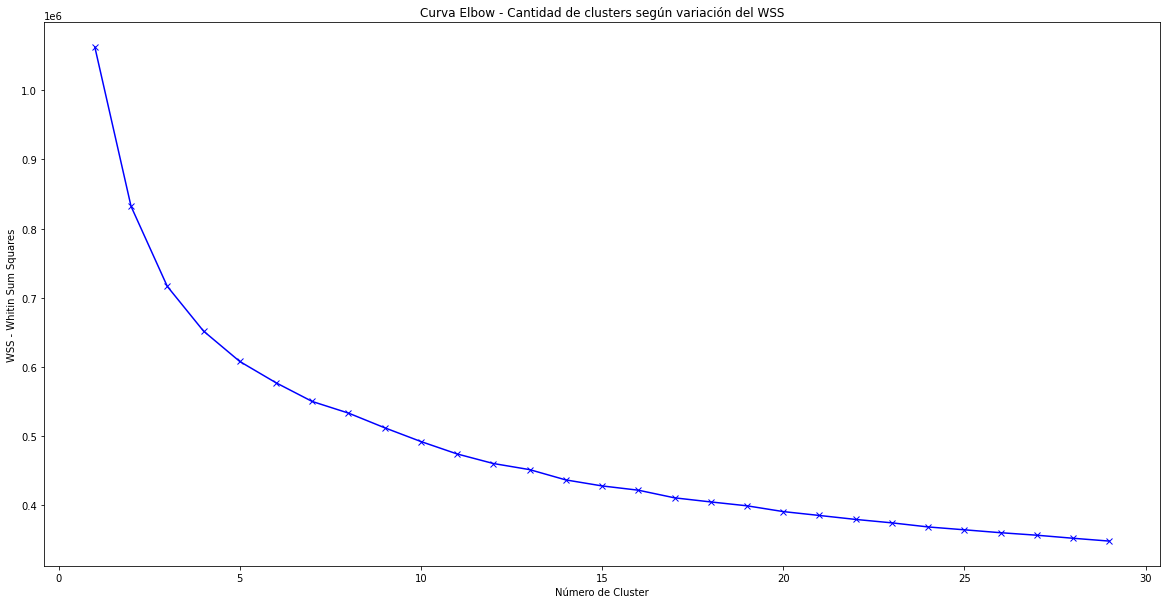

In [23]:
plt.figure(figsize=(20, 10))
plt.plot(nClusters,scores,'bx-')
plt.xlabel('Número de Cluster')
plt.ylabel('WSS - Whitin Sum Squares')
plt.title('Curva Elbow - Cantidad de clusters según variación del WSS')
plt.show()

A partir del grafico se puede determinar que la cantidad optima de clusters varia entre 5 y 10.

###Construcción del modelo

Con un dentro del rango de 5-10 se construye un modelo con el algoritmo KMeans

In [24]:
K = 10
print("Mejor K: {}".format(K))
km = KMeans(n_clusters=K, n_init=10)
km.fit(df_sc)

Mejor K: 10


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Asigno a cada registro su numero de cluster correspondiente

In [25]:
clusters = km.labels_
df_c['NRO_CLUSTER'] = clusters
df_c.head(10)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,NRO_CLUSTER
track_id,,,,,,,,,,,,,
1MQTmpYOZ6fcMQc56Hdo7T,0.00162,0.426,205600,0.929,0.105000,3,0.0789,-6.729,1,0.0701,127.059,0.5390,5
1MqV6t7WeY8yIn7qDR5paJ,0.16100,0.876,149002,0.820,0.000142,6,0.0668,-3.885,0,0.1660,99.975,0.6080,6
1mqVImA1k8qma45Lqc8CNR,0.53900,0.680,218049,0.547,0.000000,10,0.0877,-4.762,1,0.0414,142.053,0.6410,8
1MQvks56R8DYB2ToA36qMi,0.98700,0.237,219027,0.114,0.050400,7,0.4630,-20.052,1,0.0407,82.954,0.0701,2
1MQWtVcs0PKsY4PA6ZvLiy,0.01680,0.703,179427,0.529,0.000573,9,0.9110,-11.112,1,0.1000,128.057,0.7720,3
1MQYA59Whe8zRBnGqgAvMP,0.32800,0.757,215907,0.416,0.001190,3,0.0535,-14.597,1,0.0665,125.038,0.7140,0
1mqydO6xMtyTPa8yo1SdVr,0.56700,0.553,260933,0.449,0.000000,11,0.0892,-11.722,1,0.0292,88.788,0.4230,8
1mqytV5qZcmzG6MgvJCpkQ,0.02230,0.673,211573,0.686,0.000184,1,0.0963,-12.194,1,0.0363,126.090,0.6620,0
1MQZ1EBQlgPOAzzC4PIRHl,0.63100,0.355,272956,0.464,0.000000,12,0.1340,-7.024,1,0.0287,153.690,0.2430,5


Muestro la cantidad de registros en cada cluster

In [26]:
df_c['NRO_CLUSTER'].value_counts()

6    16744
0    12887
2    12565
8    12008
1     9611
5     9521
7     6440
4     4762
3     3940
9       73
Name: NRO_CLUSTER, dtype: int64

Se grafican la distribución de variables para cada cluster

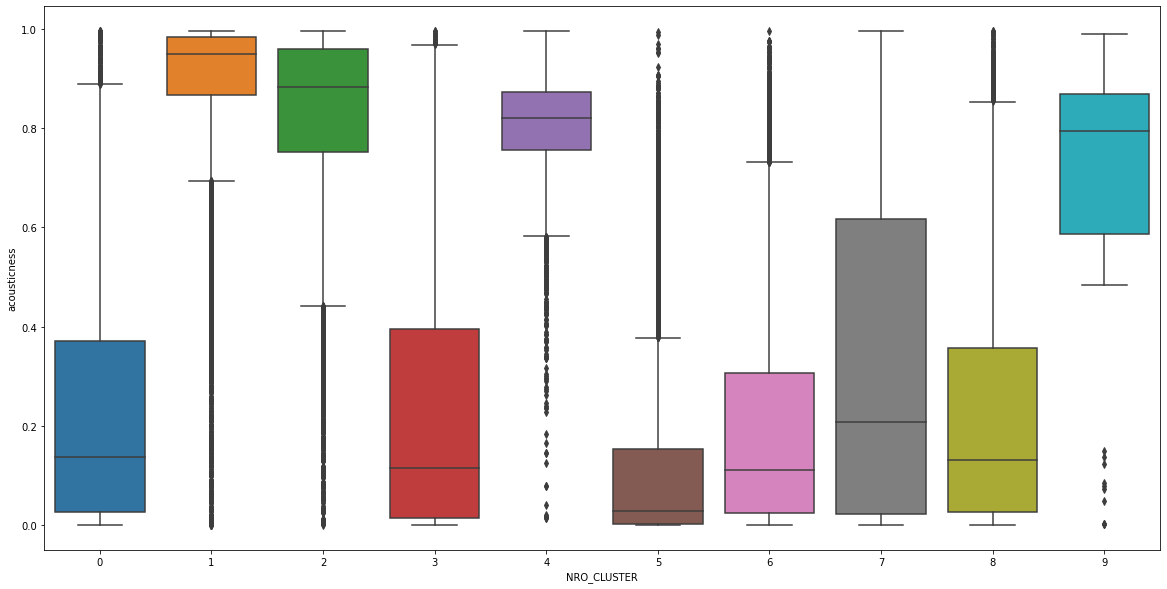

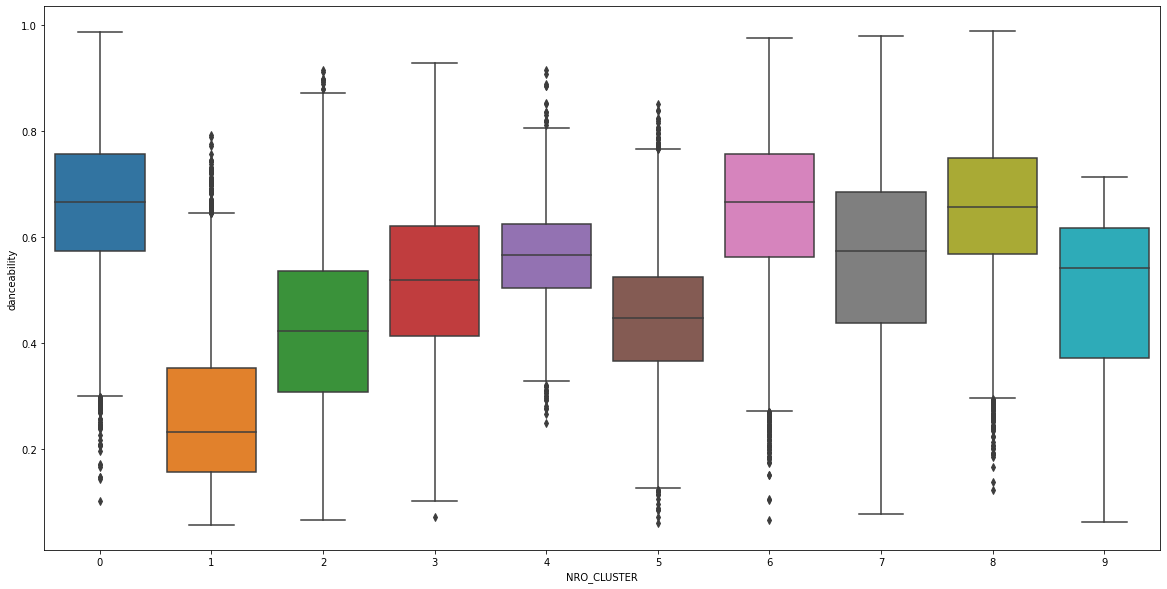

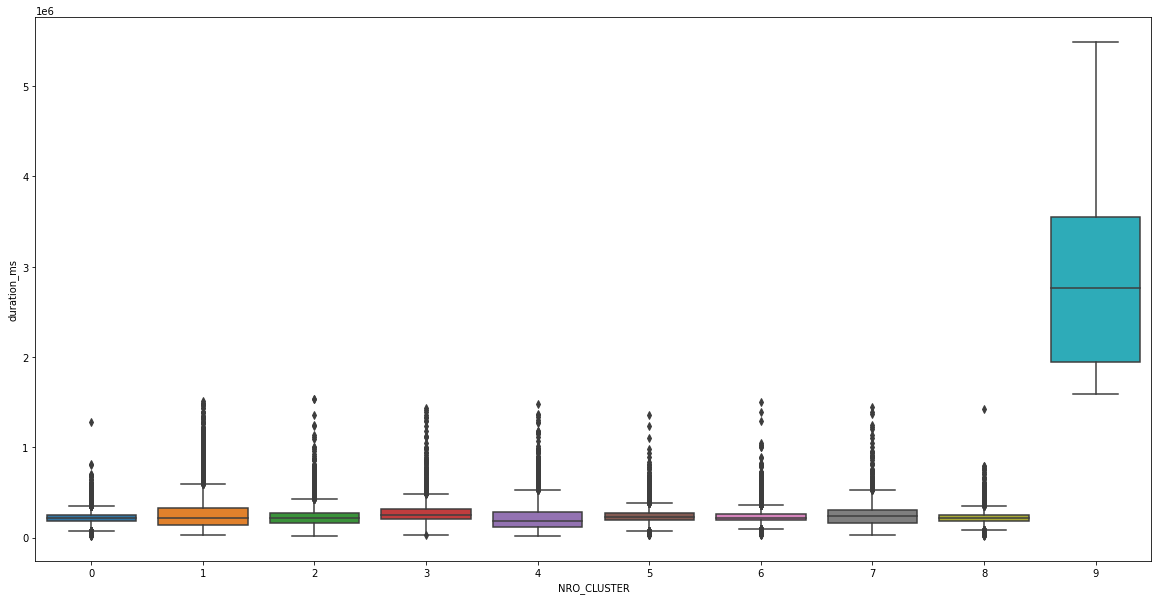

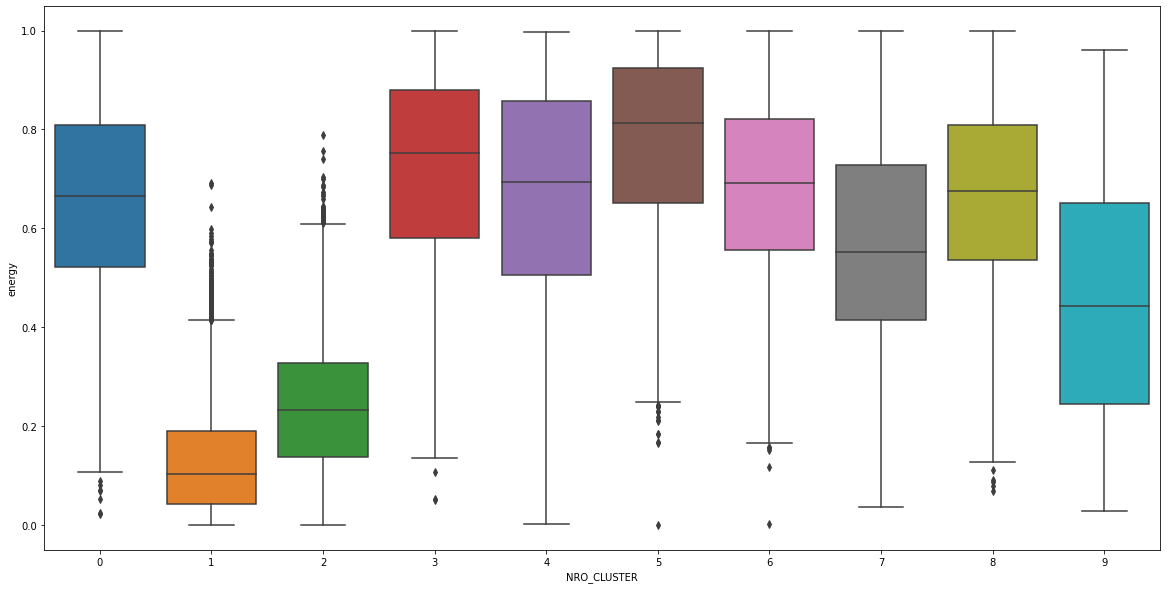

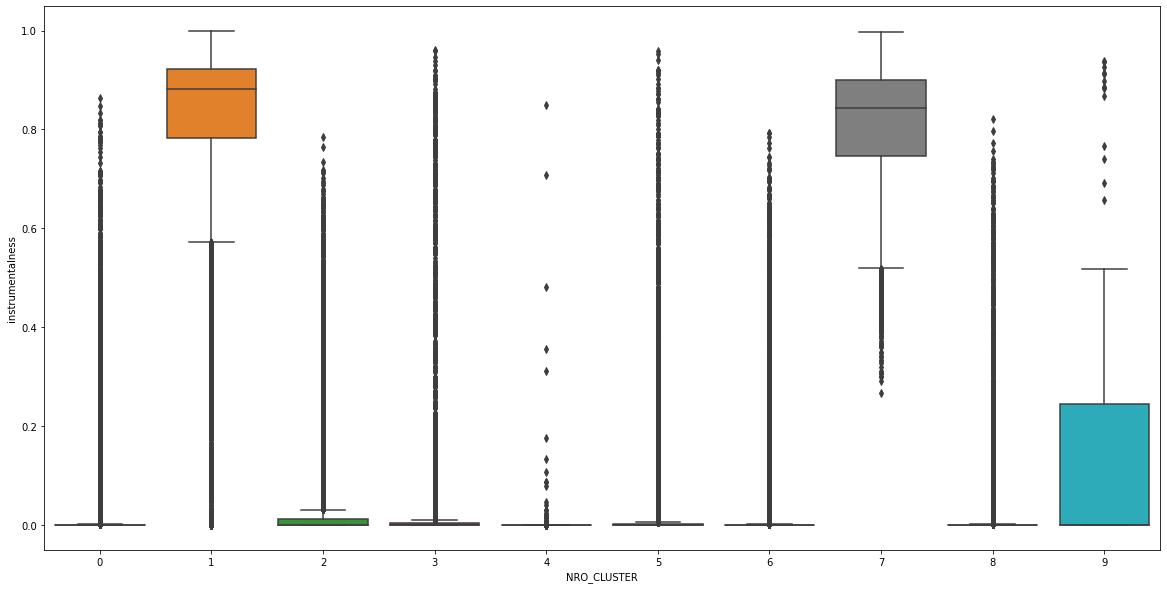

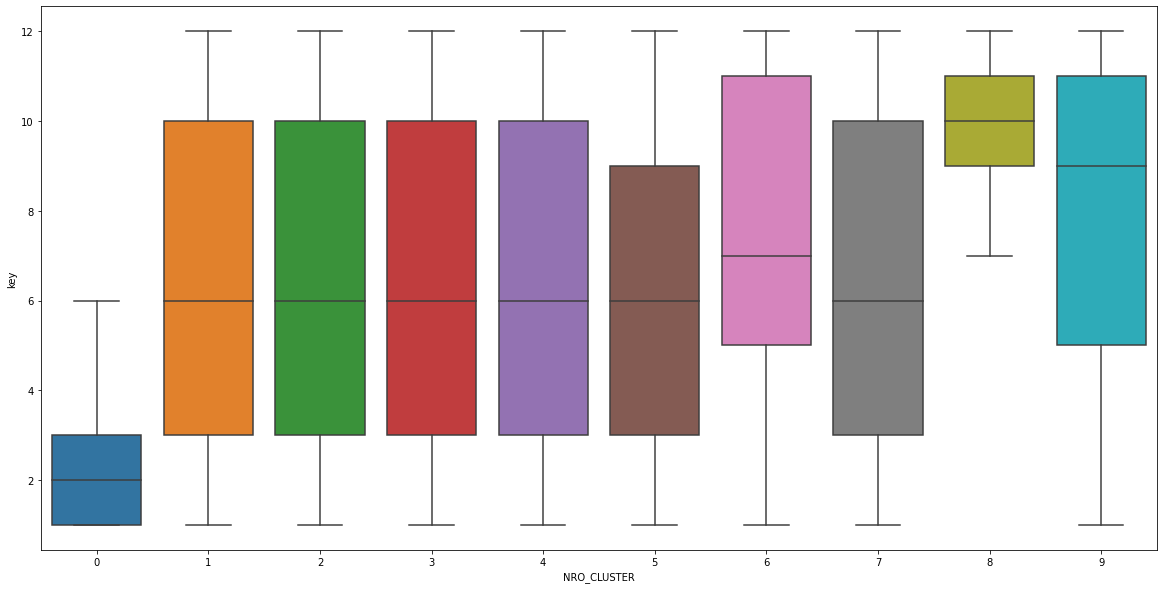

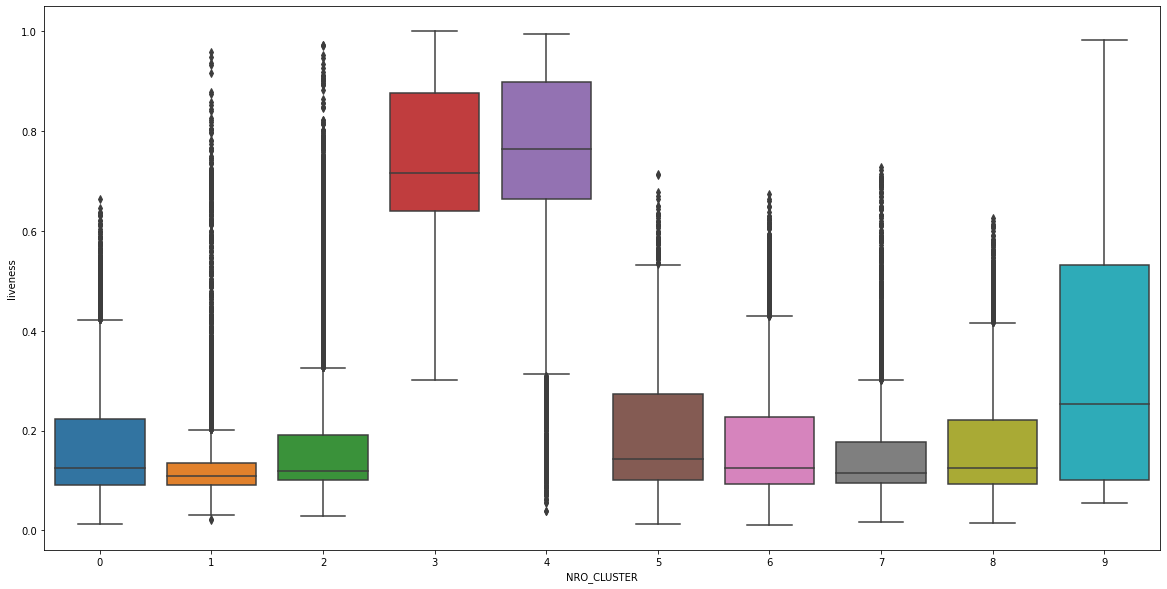

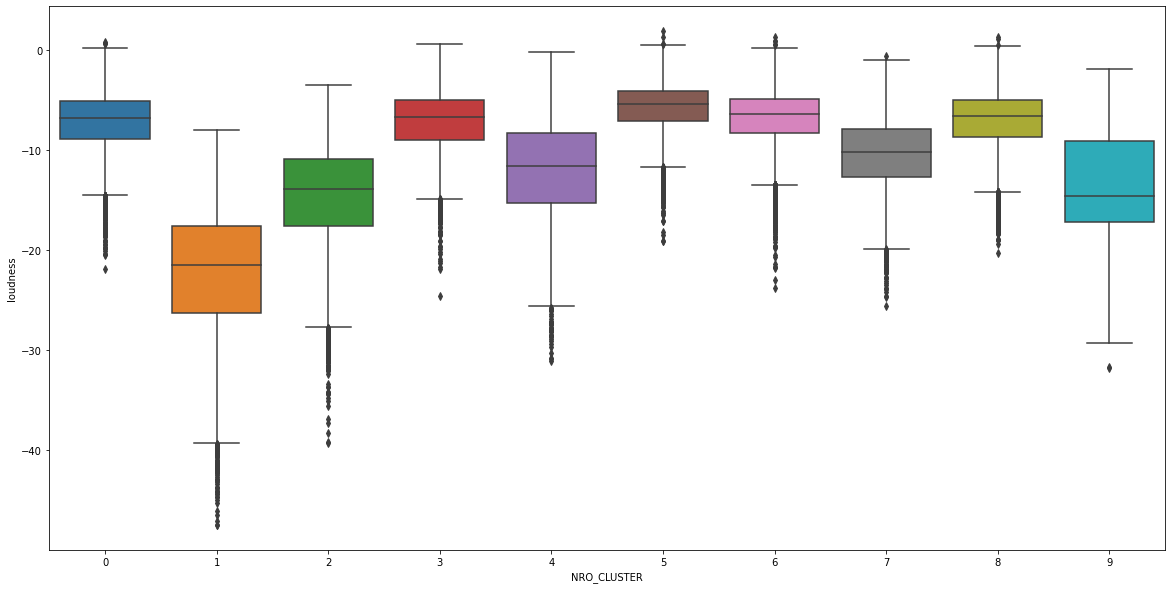

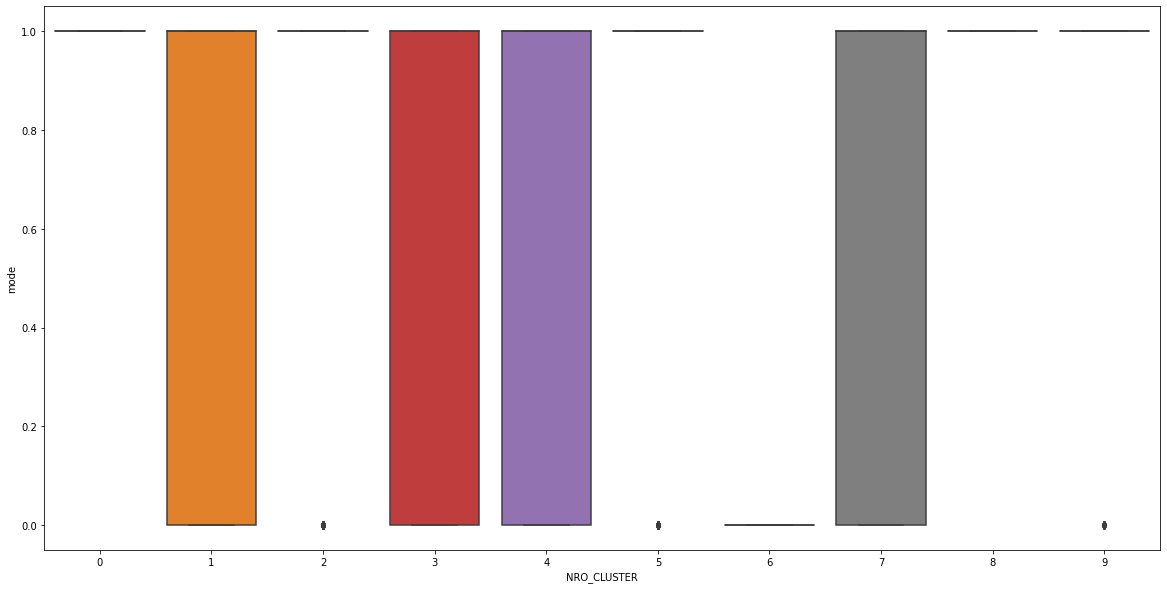

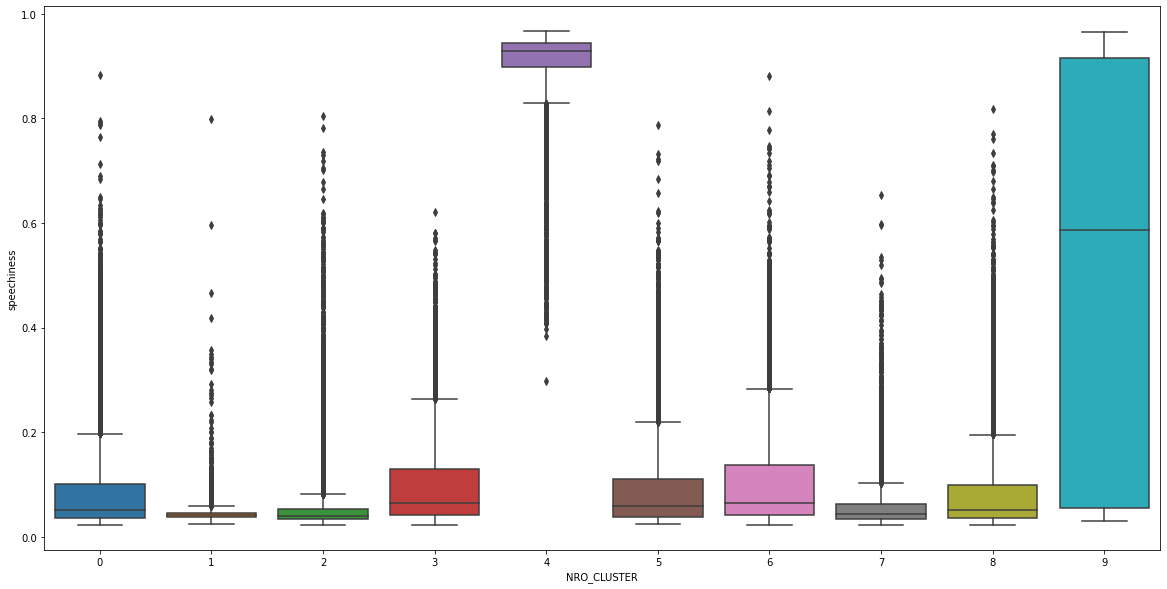

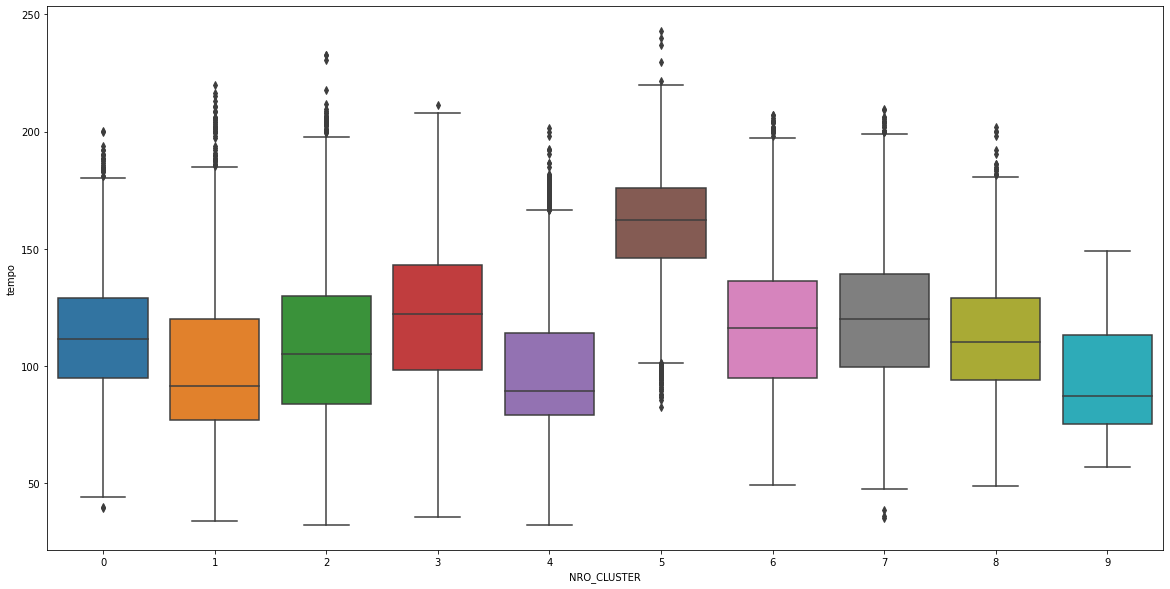

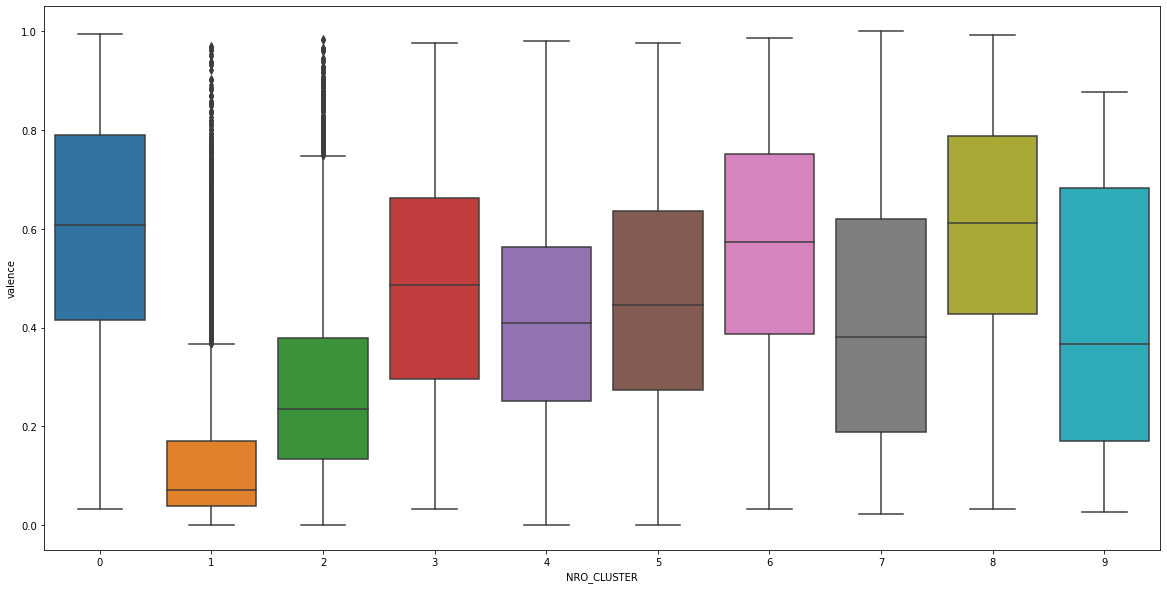

In [27]:
for c in df_c.columns:
  if not ('NRO_CLUSTER' in c):
    plt.figure(figsize=(20, 10))
    s=sns.boxplot(x="NRO_CLUSTER", y=c, data=df_c)
    s.plot()
plt.show()